In [1]:
%%time
import pandas as pd
import numpy as np

import functions as f
import config as cf
import matplotlib_charting as mp

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm

import seaborn as sns
import math
import matplotlib

#plt.style.use('bmh')
#plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")

%matplotlib inline
pd.set_option('notebook_repr_html', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 10)
pd.set_option('display.precision', 3)
pd.options.display.max_colwidth=0
pd.set_option('expand_frame_repr', False)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

plt.rcParams['figure.figsize']=(12.0, 9.0)   
plt.rcParams['font.size']=14              

plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.titlesize']=20
plt.rcParams['lines.linewidth']=3
plt.rcParams['legend.fontsize']=16
plt.rcParams['legend.fancybox']=True

CPU times: user 768 ms, sys: 48 ms, total: 816 ms
Wall time: 818 ms


In [2]:
%%time
ds1 = pd.read_pickle('dill/ds1.pkl')
ds2 = pd.read_pickle('dill/ds2.pkl')
ds3 = pd.read_pickle('dill/ds3.pkl')
ds4 = pd.read_pickle('dill/stand.pkl')

CPU times: user 188 ms, sys: 216 ms, total: 404 ms
Wall time: 405 ms


In [3]:
ds1.head()

          mnum  idx    empkey  mth_pcnt       date      year  pay_raise  eg    retdate        doh      ldate    lname  line  sg  fur   ...    func_job  jnum  fbff   snum  spcnt  lnum  lspcnt  rank_in_job  job_count   jobp  cat_order  mlong   ylong    mpay    cpay
empkey                                                                                                                                 ...                                                                                                                             
10011102  0     0    10011102 1.0000    2013-12-31 2013.0000 1.0000      1  2014-07-13 1973-02-26 1975-01-29  tooeyoo  1     0   0     ...    1         1     1    1.0000 0.0002  1    0.0002   1            166       1.0050  1          468   39.0000 11.0415 11.0415
10010475  0     1    10010475 1.0000    2013-12-31 2013.0000 1.0000      1  2014-02-05 1975-05-27 1975-05-27  rubelot  1     0   0     ...    1         1     1    2.0000 0.0003  2    0.0003   2            166

In [4]:
eg_set = np.unique(ds4.eg)

In [5]:
%%time
job_levels = cf.num_of_job_levels

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


In [6]:
%%time
formatter = FuncFormatter(mp.to_percent)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


In [7]:
%%time
proposal = 'ds1'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


In [8]:
%%time
p = eval(proposal)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.5 µs


In [9]:
p.columns

Index(['mnum', 'idx', 'empkey', 'mth_pcnt', 'date', 'year', 'pay_raise', 'eg',
       'retdate', 'doh', 'ldate', 'lname', 'line', 'sg', 'fur', 'scale',
       's_lmonths', 'age', 'new_order', 'orig_job', 'func_job', 'jnum', 'fbff',
       'snum', 'spcnt', 'lnum', 'lspcnt', 'rank_in_job', 'job_count', 'jobp',
       'cat_order', 'mlong', 'ylong', 'mpay', 'cpay'],
      dtype='object')

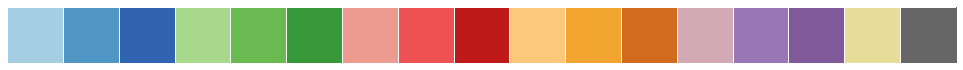

In [10]:
sns.palplot(cf.job_colors)

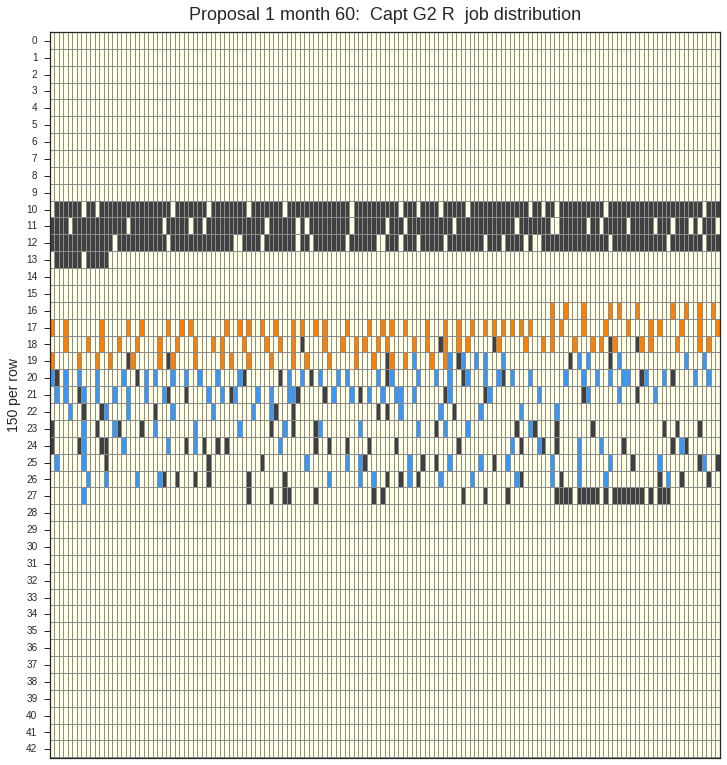

In [11]:
prop = proposal
mp.rows_of_color(prop, eval(prop), 60, ['eg', 'fur'], cf.row_colors,
                 cf.job_colors, cols=150, job_only=True, jnum=6,
                 cell_border=True, eg_border_color='.3', job_border_color='.55', xsize=12, ysize=13, chart_example=True)

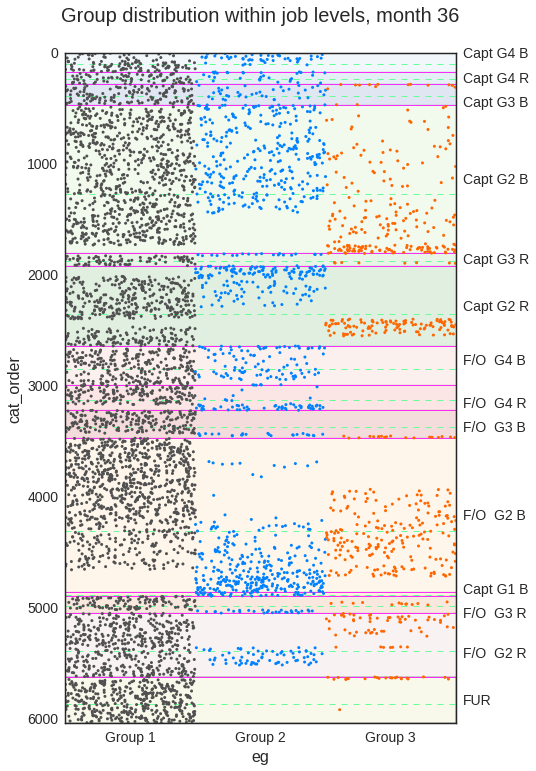

CPU times: user 644 ms, sys: 12 ms, total: 656 ms
Wall time: 654 ms


In [12]:
%%time
mp.stripplot_distribution_in_category(ds2, cf.num_of_job_levels, 36, cf.full_time_pcnt1, cf.eg_colors, cf.job_colors,
                                      cf.jobs_dict, cf.eg_dict_verbose, bg_alpha=.15, adjust_y_axis=False, chart_example=True)

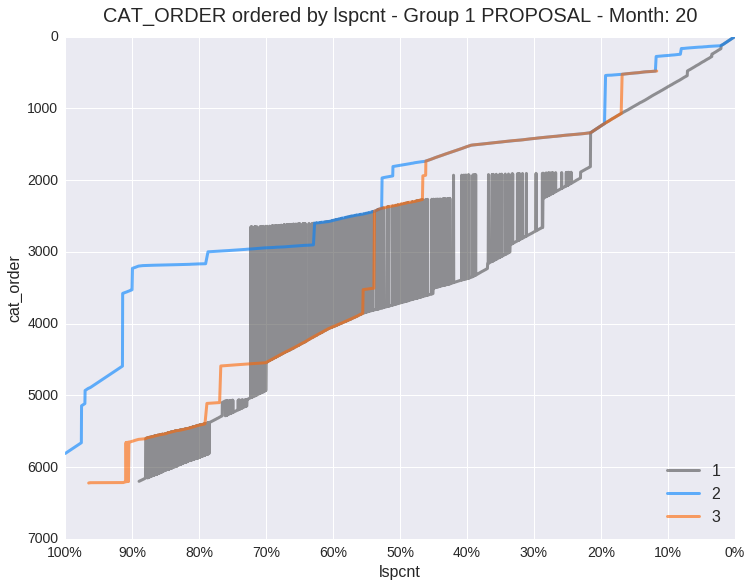

CPU times: user 272 ms, sys: 16 ms, total: 288 ms
Wall time: 287 ms


In [13]:
%%time
mp.multiline_plot_by_eg(p, 'cat_order', 'lspcnt', [1,2,3], cf.job_strs, proposal, cf.proposal_dict, job_levels,
                        cf.eg_colors, formatter, mnum=20, scatter=False, exclude_fur=False, full_pcnt_xscale=True)

In [14]:
cf.job_strs

['Capt G4 B',
 'Capt G4 R',
 'Capt G3 B',
 'Capt G2 B',
 'Capt G3 R',
 'Capt G2 R',
 'F/O  G4 B',
 'F/O  G4 R',
 'F/O  G3 B',
 'F/O  G2 B',
 'Capt G1 B',
 'F/O  G3 R',
 'F/O  G2 R',
 'Capt G1 R',
 'F/O  G1 B',
 'F/O  G1 R',
 'FUR']

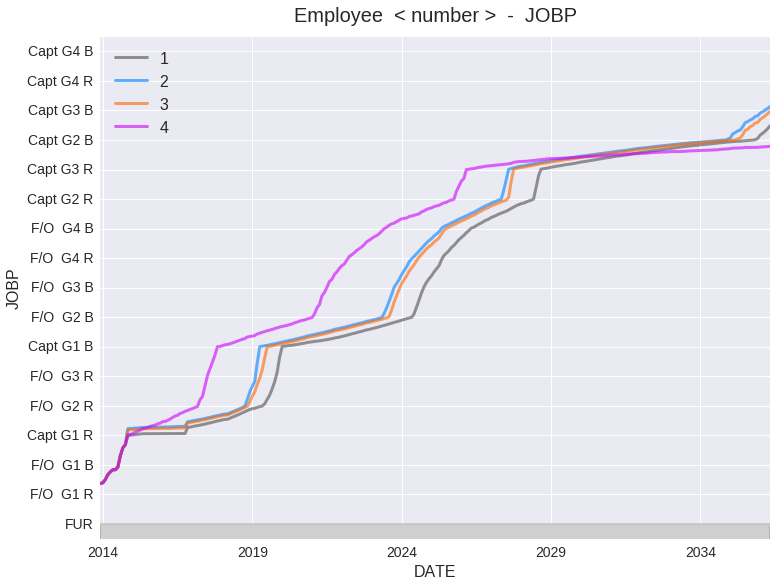

CPU times: user 400 ms, sys: 0 ns, total: 400 ms
Wall time: 398 ms


In [15]:
%%time
mp.single_emp_compare(20010360, 'jobp', [ds1, ds2, ds3, ds4], 'date', formatter, cf.job_strs, cf.eg_colors, cf.eg_dict, cf.num_of_job_levels, chart_example=True)

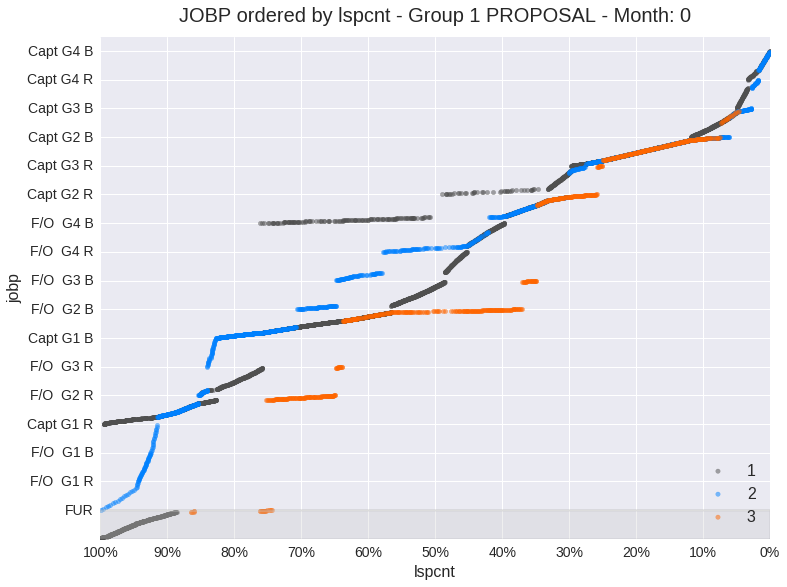

CPU times: user 392 ms, sys: 0 ns, total: 392 ms
Wall time: 387 ms


In [16]:
%%time
mp.multiline_plot_by_eg(ds3, 'jobp', 'lspcnt', [1,2,3], cf.job_strs, proposal, cf.proposal_dict, job_levels,
                        cf.eg_colors, formatter, mnum=0, scatter=True, exclude_fur=False, full_pcnt_xscale=True, chart_example=False)

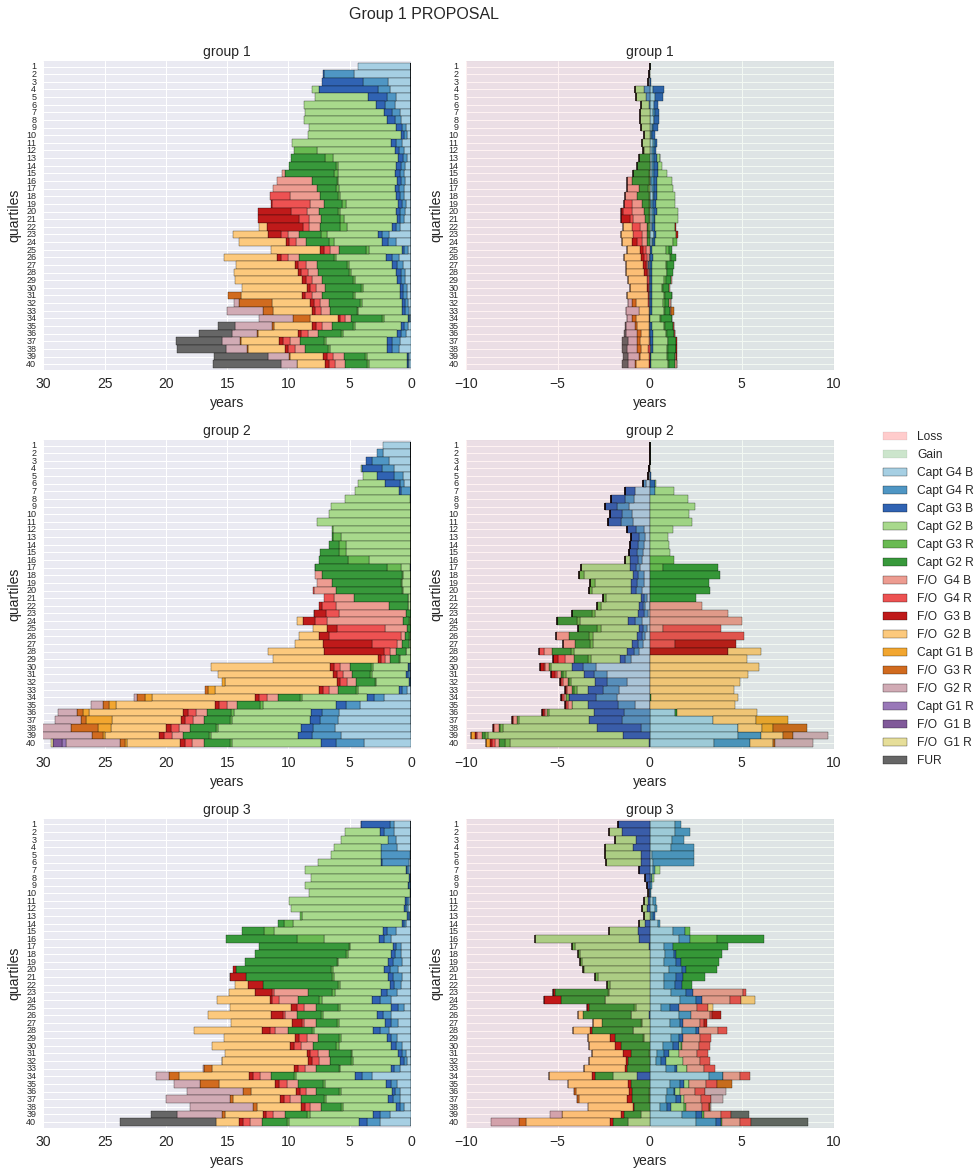

CPU times: user 8.26 s, sys: 52 ms, total: 8.32 s
Wall time: 8.32 s


In [17]:
%%time
mp.quartile_years_in_position(p, ds4, job_levels, 40, cf.job_strs, proposal, cf.proposal_dict, cf.eg_dict,
                              cf.job_colors, flip_x=True, flip_y=False, ysize=16, xsize=12, plot_differential=True,
                              rotate=True, custom_color=False, cm_name='Set1', normalize_yr_scale=True, gain_loss_bg=True)

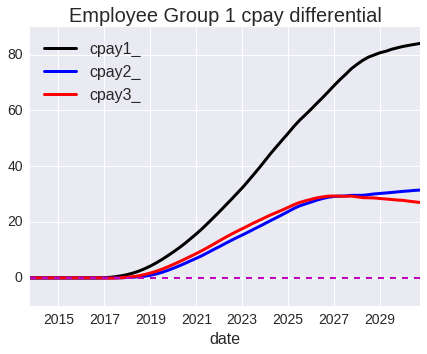

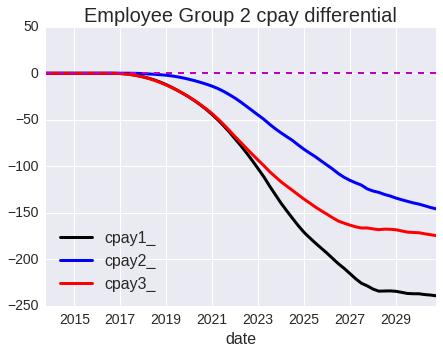

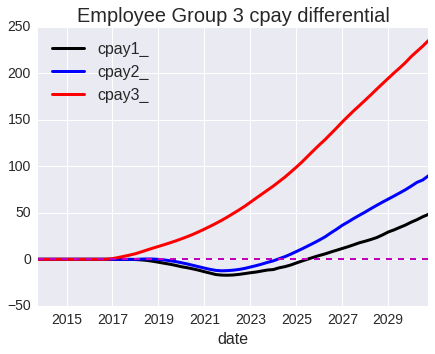

In [18]:
mp.diff_range([ds1, ds2, ds3], ds4, 'cpay', [1,2,3], [1, 2, 3], formatter, 'Q', show_range=False, show_mean=True, year_clip=2030, xsize=7, ysize=5)

In [19]:
cf.case_study

'sample3'

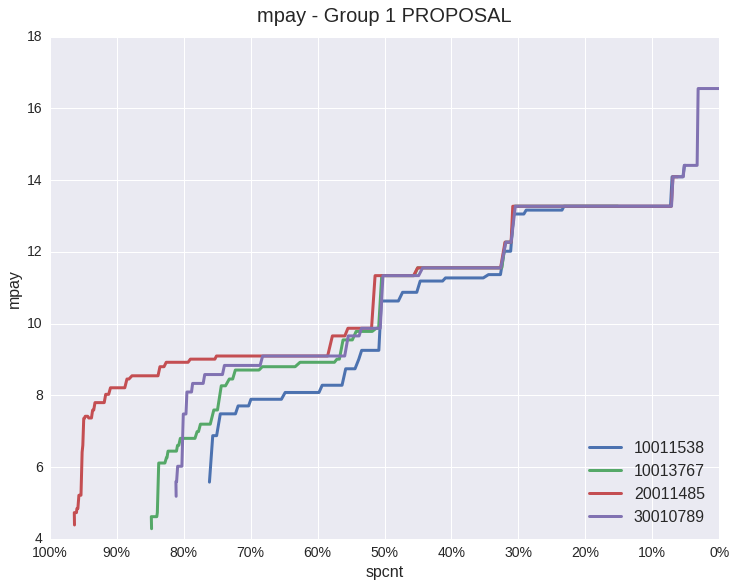

CPU times: user 340 ms, sys: 24 ms, total: 364 ms
Wall time: 366 ms


In [20]:
%%time
emps = [10011538, 10013767, 20011485, 30010789]
mp.multiline_plot_by_emp(p, 'mpay', 'spcnt', emps, job_levels, cf.eg_colors, cf.job_strs, proposal, cf.proposal_dict, formatter, chart_example=False)

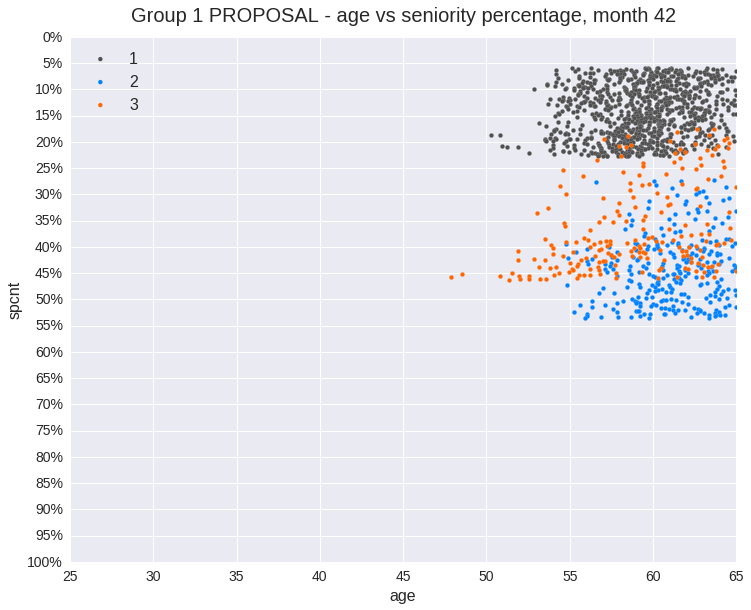

CPU times: user 304 ms, sys: 4 ms, total: 308 ms
Wall time: 307 ms


In [21]:
%%time
job_p = p[p.jnum==4]
with sns.axes_style('darkgrid'):
    mp.age_vs_spcnt(job_p, [1,2,3], 42, cf.eg_colors, cf.eg_dict, proposal, cf.proposal_dict, formatter, chart_example=False)

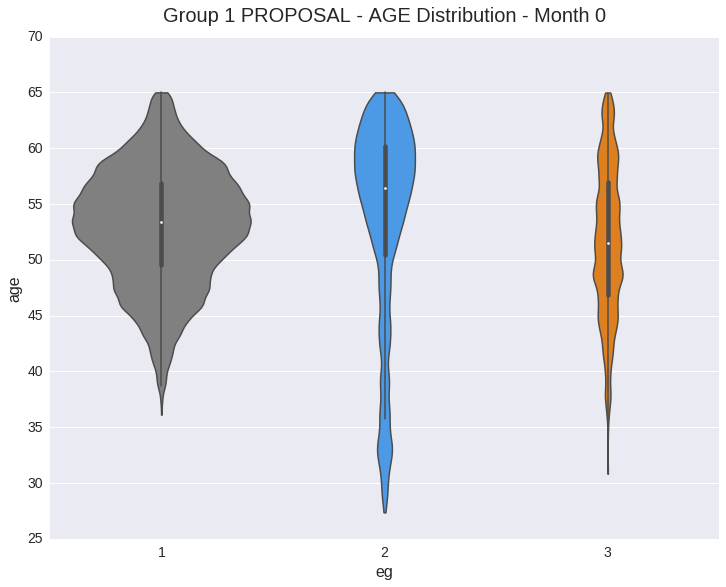

CPU times: user 688 ms, sys: 4 ms, total: 692 ms
Wall time: 233 ms


In [22]:
%%time
mp.violinplot_by_eg(p, 'age', proposal, cf.proposal_dict, formatter, mnum=0, scale='count', chart_example=False)

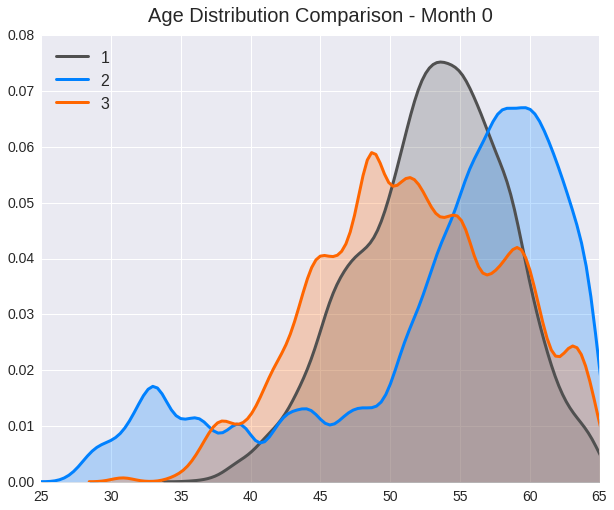

CPU times: user 564 ms, sys: 8 ms, total: 572 ms
Wall time: 236 ms


In [ ]:
%%time
mp.age_kde_dist(p, cf.eg_colors, cf.eg_dict, mnum=0, chart_example=False)

In [ ]:
%%time
mp.eg_diff_boxplot([ds1, p, ds3, ds4], formatter, measure='spcnt', comparison='standalone', xsize=22, year_clip=2035, chart_example=False)

In [ ]:
emp_list = [10011538, 10013767, 20011485, 30010789]

In [ ]:
prop = 'ds1'
mp.multiline_plot_by_emp(eval(prop), 'jobp', 'date', emp_list, cf.num_of_job_levels,
                         cf.eg_colors, cf.job_strs, prop, cf.proposal_dict, formatter, chart_example=False)

In [ ]:
%%time
mp.job_level_progression(p, emp_list, '2030-12-31', job_levels,
                          cf.eg_colors, cf.job_colors,
                          cf.eg_counts, cf.j_changes, alpha=.1, chart_example=False)

In [ ]:
%%time
mp.parallel(ds1, ds2, ds3, ds4, [1, 2, 3], 'jobp', [0, 60, 120], cf.num_of_job_levels, formatter,
            left='sa', a_stride=70, e_stride=30, w_stride=19, xsize=5, ysize=5)

In [ ]:
%%time
mnum = 0
mnum_p = p[p.mnum==mnum].copy()
with sns.axes_style("whitegrid"):
    ax = sns.stripplot(y='new_order', x='eg', data=mnum_p, jitter=.5, order=np.arange(1, 4),
                       palette=cf.eg_colors, size=3, linewidth=0, split=True)
    ax.set_axis_bgcolor('#fff5e5')
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.ylim(len(mnum_p), 0)
plt.show()

In [ ]:
# xval: sep_eg_order, new_order, (idx if ds4 is proposal)
# 
mp.differential_scatter(ds4, [ds1, p, ds3], 'spcnt', 'age', 65, eg_set, 
                        formatter, prop_order=True,
                        show_scatter=True, show_lin_reg=False, show_mean=False,
                        mean_len=80,
                        dot_size=20, lin_reg_order=12,
                        ylimit=False, ylim=5,
                        width=15, height=10, bright_bg=False, chart_style='darkgrid', chart_example=True)

In [ ]:
prop = 'ds1'
mp.job_grouping_over_time(eval(prop), prop, [1,2,3], cf.job_strs, cf.job_colors,
                          formatter, rets_only=True, time_group='A', plt_kind='bar',
                          measure_subset='jobp', measure_val=3, measure_val2=200, operator='greater_than', display_yrs=40, legend_loc=4, xsize=11, ysize=6, chart_example=False)

In [ ]:
mp.quartile_bands_over_time(p, 3, 'spcnt', formatter, bins=20, clip=True, year_clip=2035, kind='area', quartile_ticks=False,
                             custom_color=True, cm_name='Set1', quartile_alpha=.6, grid_alpha=.5, custom_start=0, custom_finish=.75,
                             xsize=10, ysize=8, alt_bg_color=False, bg_color='#faf6eb')

In [ ]:
prop = 'ds1'
base = 'ds4'
mp.job_transfer(eval(prop), prop, eval(base), base, 3, cf.job_colors, cf.num_of_job_levels, custom_color=False, gb_period='M')

# Make colormap

In [ ]:
cm_name='Paired'
num_of_colors = 8 + 1
cm_subsection = np.linspace(0, .75, num_of_colors)
colormap = eval('cm.' + cm_name)
colors = [colormap(x) for x in cm_subsection]

In [ ]:
colors

In [ ]:
sns.palplot(colors)

In [ ]:
%%time
cf.job_colors

In [ ]:
%%time
sns.palplot(cf.job_colors)

In [ ]:
%%time
ds1.columns

In [ ]:
%%time
empnum = 20011327
mp.emp_quick_glance(empnum, ds3)

In [ ]:
%%time
empnum = 20011327
measure = ['cat_order']
with sns.axes_style('darkgrid'):
    p.loc[empnum].set_index('date')[measure].plot()
plt.gca().invert_yaxis()

for attr in measure:
    if attr in ['jnum', 'jobp']:
        plt.yticks = (np.arange(17, 0, 1))
        plt.ylim(17.5, 0)
        break
    if attr in ['spcnt', 'lspcnt']:
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.yticks(np.arange(0, 1.05, .05))
        break
plt.show()

#### plt scatter method...

In [ ]:
%%time
emp_list = [10011538, 10013767, 20011485, 30010789]
ds = p
measure1 = 'age'
measure2 = 'cat_order'
i = 0
for emp in emp_list:
    plt.scatter(ds.loc[emp][measure1], ds.loc[emp][measure2].pct_change(), c=cf.color1[i], linewidth=0, label=emp)
    i += 1
ax = plt.gca()
ax.invert_yaxis()
#ax.invert_xaxis()
plt.xlabel(measure1)
plt.ylabel(measure2)
plt.legend(loc='best')
plt.title('percent change', y=1.02)
plt.ylim(.02, -.12)
plt.show()

In [ ]:
%%time
ds4.jnum.max()

In [ ]:
%%time
eg = 1
base = ds4
eg_list = [1, 2, 3]
plot_egs_sep = True
xsize=7
ysize=5

In [ ]:
%%time
base[base.eg==2].groupby(['date', 'jnum']).size().astype(int).unstack().plot()
p[p.eg==2].groupby(['date', 'jnum']).size().astype(int).unstack().plot()
plt.show()

### slicing and groupby month

In [ ]:
%%time
measure = 'lspcnt'
fig, ax = plt.subplots(111)
ax = plt.subplot(111)
df = p[p.age > 50]
for eg in np.unique(df.eg):
    col_name = 'group ' + str(eg) + ' ' + measure
    df_jobp = pd.DataFrame(df[df.eg==eg][['date', measure]].groupby('date').mean().unstack().fillna(0), columns=[col_name])
    df_jobp.reset_index()[['date', col_name]].set_index('date').plot(c=cf.eg_colors[eg - 1], label=cf.eg_dict_verbose[eg], ax=ax)
ax.invert_yaxis()
plt.show()

In [ ]:
%%time
mp.job_count_charts(p, ds4, plot_egs_sep=False)

In [ ]:
%%time
proposal = 'ds1'
mp.eg_multiplot_with_cat_order(eval(proposal), proposal, 40, 'cat_order', 'lspcnt', formatter, cf.proposal_dict, cf.job_strs, cf.job_colors, cf.num_of_job_levels)